Descriptive Statistics Summary:
                               Count        Mean      Median       Mode      Variance  Standard Deviation     Minimum     Maximum        25%  50% (Median)         75%       Range         IQR  Skewness  Kurtosis
S31 Heat demand (%)            8760    0.000114    0.000087   0.000018  7.723091e-09            0.000088    0.000010    0.000359   0.000035      0.000087    0.000179    0.000348    0.000145  0.731203 -0.612357
S32 Heat demand (%)            8760    0.000114    0.000094   0.000025  6.560758e-09            0.000081    0.000023    0.000360   0.000040      0.000094    0.000171    0.000337    0.000131  0.767235 -0.302562
S41 Heat demand (%)            8760    0.000114    0.000082   0.000013  1.004791e-08            0.000100    0.000008    0.000399   0.000025      0.000082    0.000189    0.000391    0.000164  0.796194 -0.644288
Outside temp (0.1 °C)          8740  105.891762  103.000000  53.000000  4.958097e+03           70.413757 -110.000000  321.00000

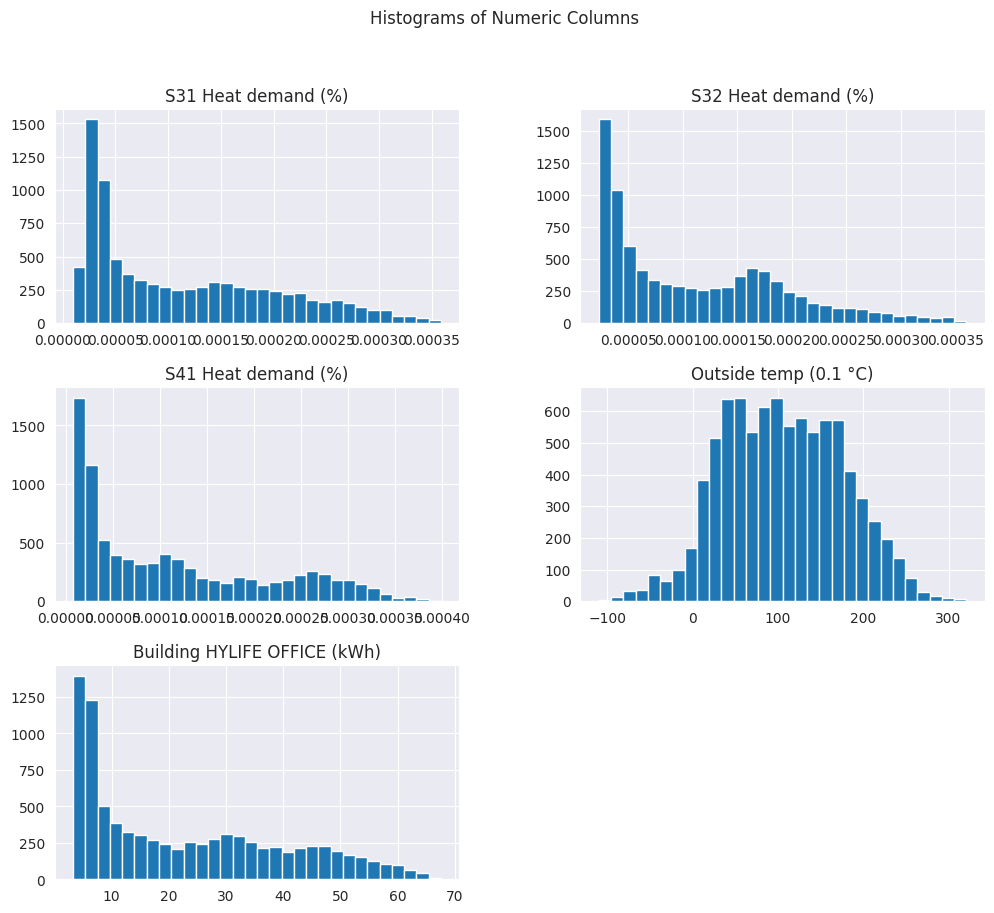

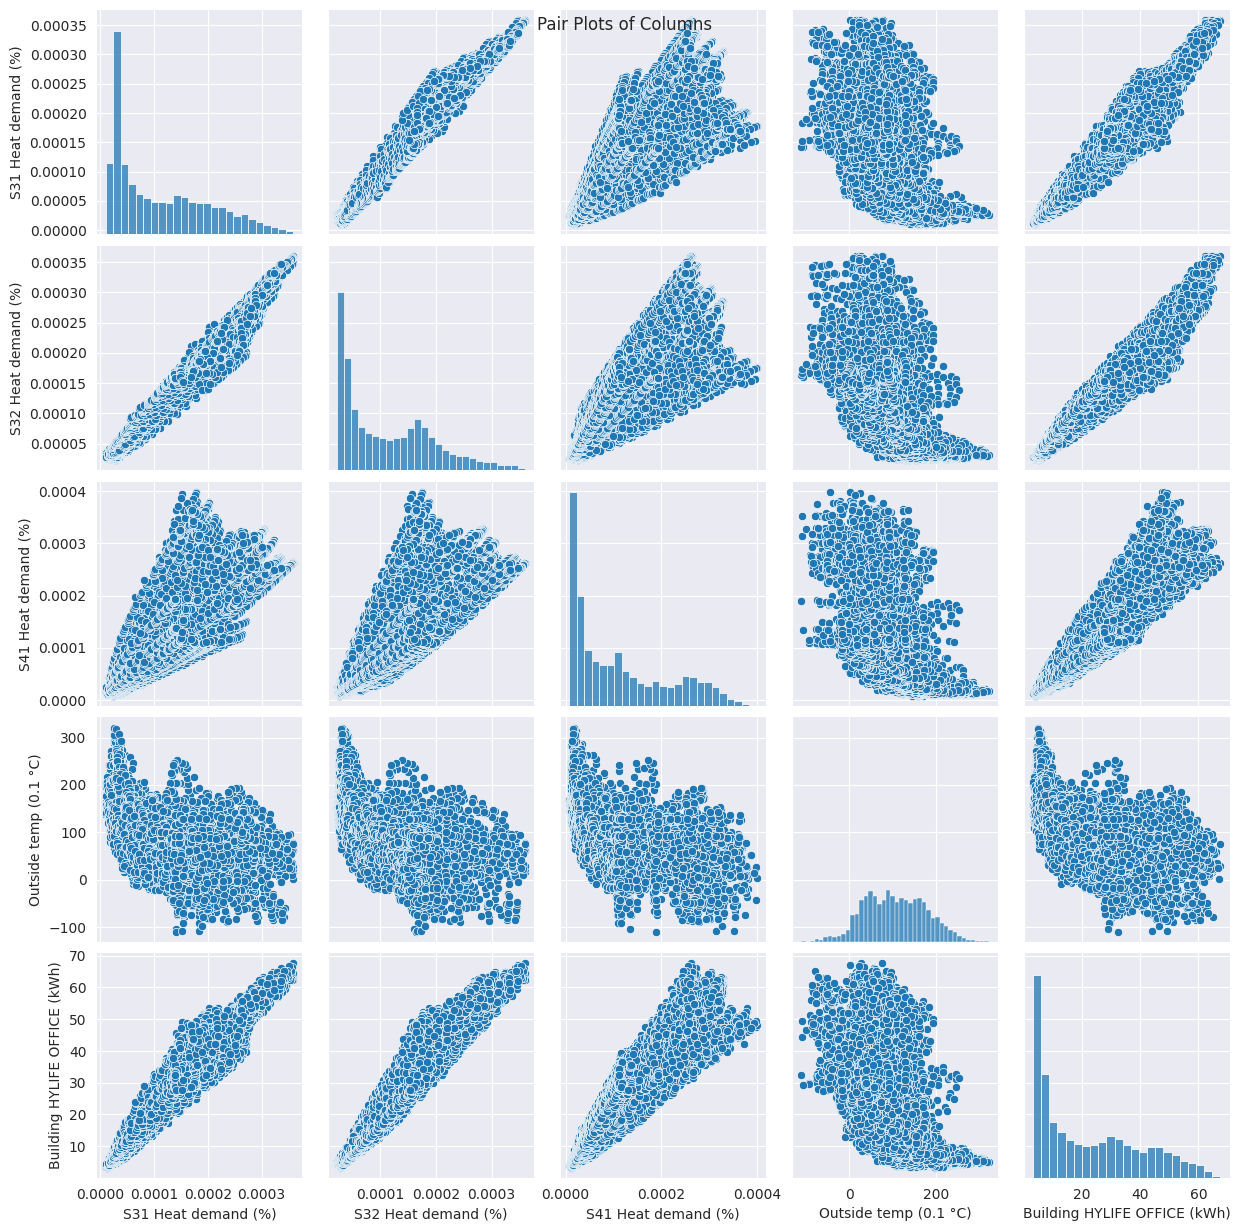

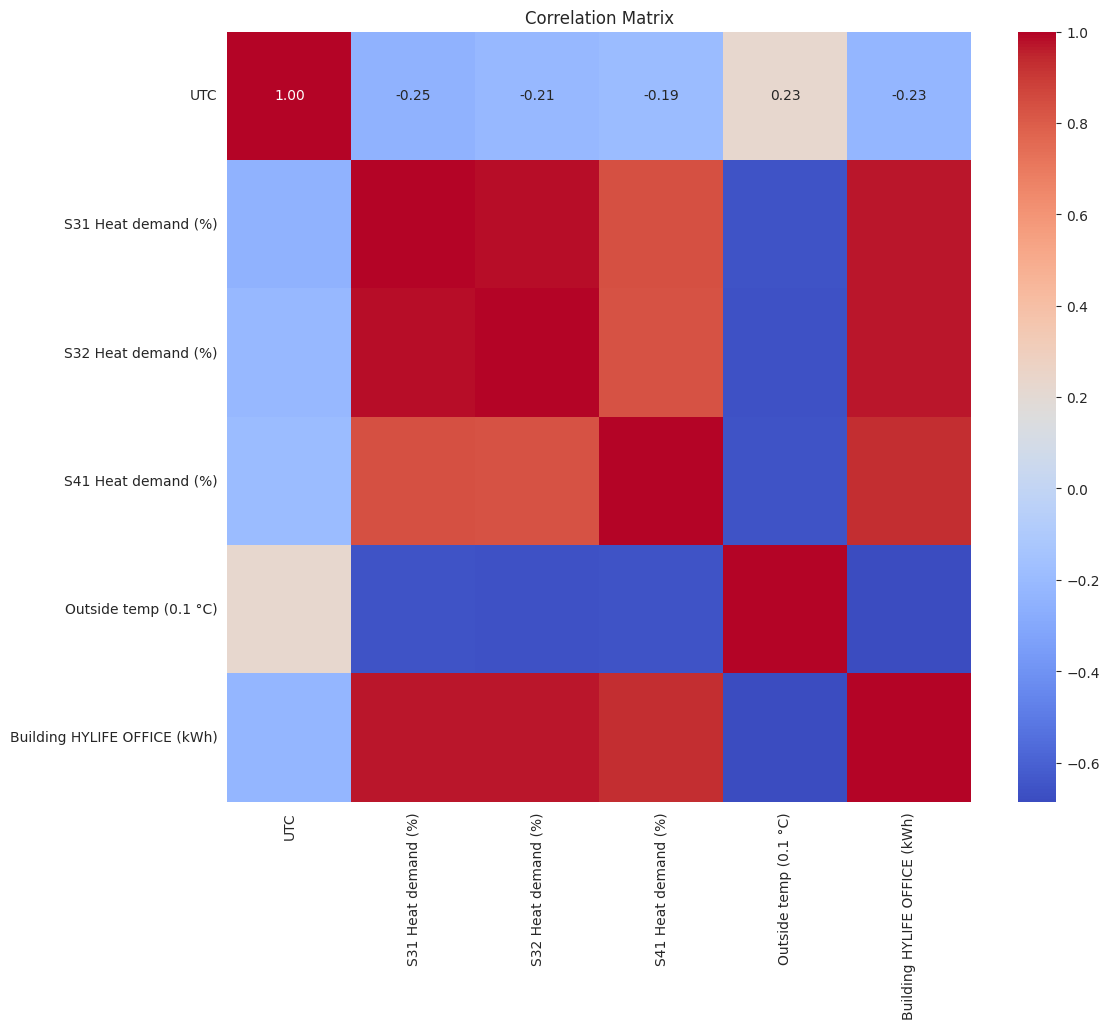

Descriptive Statistics Summary exported to summary_statistics.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


def set_display_options():
    # Set the display options for pandas DataFrame
    pd.set_option('display.max_rows', 1000)
    pd.set_option('display.max_columns', 1000)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.expand_frame_repr', False)  # Disable wrapping of the output



def load_and_preprocess_data(file_path):
    # Load the data and perform initial preprocessing
    df = pd.read_csv(file_path, delimiter=',')
    df['UTC'] = pd.to_datetime(df['UTC'])  # Convert 'UTC' column to datetime format
    df['Outside temp (0.1 °C)'] = pd.to_numeric(df['Outside temp (0.1 °C)'])  # Convert 'Outside temp (0.1 °C)' to numeric
    return df


def calculate_descriptive_statistics(df):
    # Calculate various descriptive statistics    
    numeric_cols_df = df.select_dtypes(include='number')  # Filter out non-numeric columns
    summary_df = pd.DataFrame({
        'Count': numeric_cols_df.count(),
        'Mean': numeric_cols_df.mean(),
        'Median': numeric_cols_df.median(),
        'Mode': numeric_cols_df.mode().iloc[0],
        'Variance': numeric_cols_df.var(),
        'Standard Deviation': numeric_cols_df.std(),
        'Minimum': numeric_cols_df.min(),
        'Maximum': numeric_cols_df.max(),
        '25%': numeric_cols_df.quantile(0.25),
        '50% (Median)': numeric_cols_df.quantile(0.5),
        '75%': numeric_cols_df.quantile(0.75),
        'Range': numeric_cols_df.max() - numeric_cols_df.min(),
        'IQR': numeric_cols_df.quantile(0.75) - numeric_cols_df.quantile(0.25),
        'Skewness': numeric_cols_df.skew(),
        'Kurtosis': numeric_cols_df.kurt(),
    })
    return summary_df


def perform_eda(df):
    # Exploratory Data Analysis: Visualization of distributions and relationships in the data
    # Plot histograms for numeric columns
    df.select_dtypes(include='number').hist(figsize=(12, 10), bins=30)
    plt.suptitle('Histograms of Numeric Columns')
    plt.show()

    # Plot pair plot to visualize relationships
    sns.pairplot(df)
    plt.suptitle('Pair Plots of Columns')
    plt.show()

    # Correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()


def main():
    set_display_options()

    # Load and preprocess data
    file_path = 'Cleaned_Semtex_assignment.csv'
    df = load_and_preprocess_data(file_path)

    # Calculate and display descriptive statistics
    summary_df = calculate_descriptive_statistics(df)
    print("Descriptive Statistics Summary:\n", summary_df)

    # Perform exploratory data analysis
    perform_eda(df)
    
    summary_df.T.to_csv('summary_statistics.csv')
    print("Descriptive Statistics Summary exported to summary_statistics.csv")


if __name__ == "__main__":
    main()
